# PyMongo Query

db = "test"
collection = "benchmarklogs"

In [1]:
from pymongo import MongoClient
client = MongoClient()

db = client['test']
collection = db['benchmarklogs']

# PyMongo Query ->Pandas DataFrame

In [2]:
import pandas as pd

query = {"$and":[ {"$or":[ {"usedGenesisJson":"genesis_poa_gasLimit_1.json"},{"usedGenesisJson":"genesis_poa_gasLimit_05.json"},{"usedGenesisJson":"genesis_poa_gasLimit_2.json"},{"usedGenesisJson":"genesis_poa_gasLimit_4.json"},{"usedGenesisJson":"genesis_poa_gasLimit_8.json"} ]}, 
        {"maxTransactions": 1000}, {"instanceType":'c5.xlarge'}, {"nodes":5}, {"scenario":"account"}]}

# query = {}

# Make a query to the specific DB and Collection
cursor = collection.find(query)

# Expand the cursor and construct the DataFrame
df = pd.DataFrame(list(cursor))

#display(df.head(200))

# Pandas DataFrame -> Plot
## Throughput

In [3]:
import matplotlib.pyplot as plt

data_tps = df[['txPerSecond','usedGenesisJson']]
#print(data_tps)

title = "Throughput against GasLimit (PoA)"
xlabel = "GasLimit Factor"
ylabel = "Transactions Per Second (TPS)"
objects = list(["Factor 0.5","Factor 1","Factor 2","Factor 4","Factor 8"])

## combine these different collections into a list    
data_to_plot = [data_tps.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_05.json"].iloc[:,0],
                data_tps.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_1.json"].iloc[:,0],
                data_tps.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_2.json"].iloc[:,0],
                data_tps.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_4.json"].iloc[:,0],
                data_tps.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_8.json"].iloc[:,0]]


avg1_tps = data_tps.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_05.json"].iloc[:,0].mean()
avg2_tps = data_tps.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_1.json"].iloc[:,0].mean()
avg3_tps = data_tps.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_2.json"].iloc[:,0].mean()
avg4_tps = data_tps.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_4.json"].iloc[:,0].mean()
avg5_tps = data_tps.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_8.json"].iloc[:,0].mean()

print(avg1_tps)
print(avg2_tps)
print(avg3_tps)
print(avg4_tps)
print(avg5_tps)

5.086585779690443
9.705455346534027
17.957728814157868
36.02259437313089
52.232892196751415


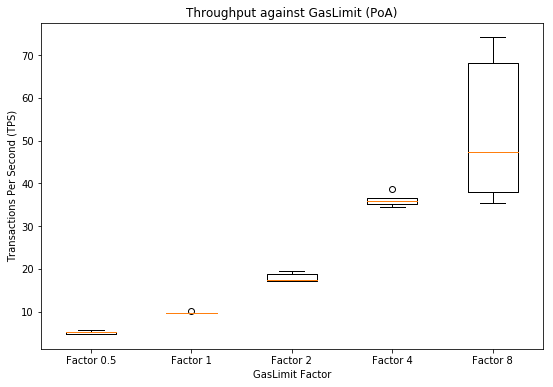

In [4]:
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

# Create the boxplot
bp = ax.boxplot(data_to_plot,labels=objects)
fig.savefig("gasLimit_poa_throughput_boxplot.svg", format="svg")



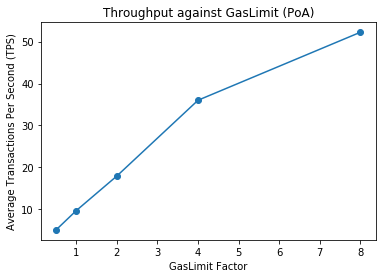

In [5]:
plt.plot([0.5,1,2,4,8],[avg1_tps,avg2_tps,avg3_tps,avg4_tps,avg5_tps], marker='o')
plt.title(title)
plt.ylabel("Average Transactions Per Second (TPS)")
plt.xlabel(xlabel)
plt.savefig("gasLimit_poa_throughput_lines_average.svg", format="svg")
plt.show()

## Latency

In [6]:
data_latency = df[['averageDelay','usedGenesisJson']]
#print(data_latency)

title = "Latency against GasLimit (PoA)"
xlabel = "GasLimit Factor"
ylabel = "Transaction Latency [seconds]"

## combine these different collections into a list    
data_to_plot = [data_latency.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_05.json"].iloc[:,0],
                data_latency.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_1.json"].iloc[:,0],
                data_latency.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_2.json"].iloc[:,0],
                data_latency.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_4.json"].iloc[:,0],
                data_latency.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_8.json"].iloc[:,0]]

avg1_latency = data_latency.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_05.json"].iloc[:,0].mean()
avg2_latency = data_latency.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_1.json"].iloc[:,0].mean()
avg3_latency = data_latency.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_2.json"].iloc[:,0].mean()
avg4_latency = data_latency.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_4.json"].iloc[:,0].mean()
avg5_latency = data_latency.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_8.json"].iloc[:,0].mean()

print(avg1_latency)
print(avg2_latency)
print(avg3_latency)
print(avg4_latency)
print(avg5_latency)

99.85157929999998
53.98155749999997
28.58972330000001
16.724852699999992
13.300552200000004


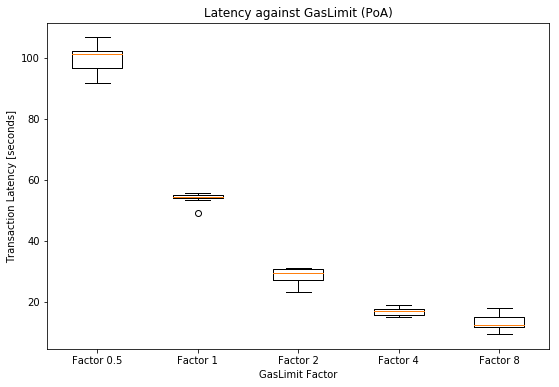

In [7]:
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

# Create the boxplot
bp = ax.boxplot(data_to_plot,labels=objects)
fig.savefig("gasLimit_poa_latency_boxplot.svg", format="svg")

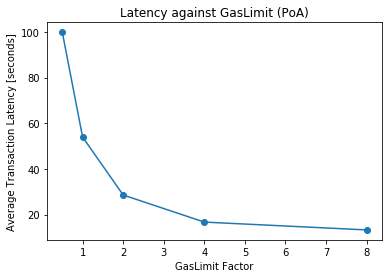

In [8]:
plt.plot([0.5,1,2,4,8],[avg1_latency,avg2_latency,avg3_latency,avg4_latency,avg5_latency], marker='o')
plt.title(title)
plt.ylabel("Average Transaction Latency [seconds]")
plt.xlabel(xlabel)
plt.savefig("gasLimit_poa_latency_lines_average.svg", format="svg")
plt.show()

## Throughput and Latency Combined

   Average Throughput [TPS]  Average Latency [seconds]
0                  5.086586                  99.851579
1                  9.705455                  53.981557
2                 17.957729                  28.589723
3                 36.022594                  16.724853
4                 52.232892                  13.300552


<Figure size 432x288 with 0 Axes>

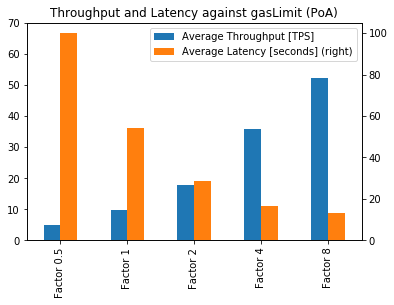

In [9]:
means_tps = [avg1_tps, avg2_tps, avg3_tps, avg4_tps, avg5_tps]
means_latency = [avg1_latency, avg2_latency, avg3_latency, avg4_latency, avg5_latency]

df = pd.DataFrame({'Average Throughput [TPS]':means_tps, 'Average Latency [seconds]':means_latency})
print(df)

fig = plt.figure()
ax = df.plot( kind= 'bar' , secondary_y= ['Average Latency [seconds]'] ,mark_right=True,ylim=(0, 70), use_index=False)
ax.set_xticklabels(objects)
ax.set_title('Throughput and Latency against gasLimit (PoA)')
ax.figure.savefig("gasLimit_poa_combined_barchart.svg", format="svg",bbox_inches='tight')
plt.show()